In [22]:
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append('../shocktubecalc')
from shocktubecalc import sod

In [50]:
def main(P, U, D, M):

    # Given constants and variables
    C_d = 0.42 # Drag coefficient
    gamma = 1.4
    points = 500 # Number of plot points in graph
    first_x = 0 # First x-value in graph
    last_x = 500 # Last x-value in the graph
    positions, regions, values = sod.solve(left_state=(500, 0.005807200929152149, 0), right_state=(100, 0.0011614401858304297, 0.),
                                           geometry=(first_x, last_x, 200), t=0.5, gamma=gamma, npts=points, dustFrac = 0)

    # Defining necessary variables
    F_d = np.zeros((points,)) # Creating an array for the drag force values
    F_pg = np.zeros((points,)) # Creating an array for the pressure gradient force values
    F_am = np.zeros((points,)) # Creating an array for the added mass force values
    A = np.pi * D**2/4 # Projected Area
    u_p = np.zeros((points,)) # Particle velocity array
    u_p[0] = U # Current particle velocity
    V_p = 4/3 * np.pi * (D/2)**3 # Particle volume
    C_m = 1/2 # Standard coefficient for added mass force
    dt = 0.0001 # Time step
    
    for i in range(0, points - 1):
        
        # Drag force calculation
        F_d[i] = 1/2 * C_d * values['rho'][i] * (u_p[i] - values['u'][i])**2 * A
        
        # Pressure gradient force calculation
        P_gradient = (values['p'][i+1] - values['p'][i-1]) / ((values['x'][points - 1] - values['x'][0])/points*2)
        F_pg[i] = - P_gradient * V_p

        # Added mass force
        F_am[i] = V_p * C_m * (- P_gradient - (values['rho'][i+1] * u_p[i] - values['rho'][i-1] * u_p[i-1])/dt)

        u_p[i+1] = u_p[i] + (F_d[i] + F_pg[i] + F_am[i])/M * dt # V_final = V_initial + (force / mass) * time (1)

    F_pg[0] = F_pg[1]
    F_am[0] = F_am[1]

    for i in range(0, points - 1):
        if F_pg[i] > 5e-9 and D < 1.5e-3:
            F_pg[i] = F_pg[i-1]
        
        if F_pg[i] > 1e-9 and D < 0.8e-3:
            F_pg[i] = F_pg[i-1]
        
        if F_pg[i] > 1e-11 and D < 0.3e-3:
            F_pg[i] = F_pg[i-1]

        if F_am[i] > 4e-9 and D < 1.5e-3:
            F_am[i] = F_am[i-1]
        
        if F_am[i] > 6e-10 and D < 0.8e-3:
            F_am[i] = F_am[i-1]

        if F_am[i] > 8e-12 and D < 0.3e-3:
            F_am[i] = F_am[i-1]
        

    # plot values
    # f, axarr = plt.subplots(5, 1, sharex='col')

    # axarr[0].plot(values['x'], F_d, linewidth=1.5)
    # axarr[0].set_ylabel(r'Drag force')
    # axarr[0].set_xlabel(r'$x$')

    # axarr[1].plot(values['x'], F_pg, linewidth=1.5)
    # axarr[1].set_ylabel(r'Pressure gradient force')
    # axarr[1].set_xlabel(r'$x$')

    # axarr[2].plot(values['x'], F_am, linewidth=1.5)
    # axarr[2].set_ylabel(r'Added mass force')
    # axarr[2].set_xlabel(r'$x$')

    # axarr[3].plot(values['x'], u_p, linewidth=1.5)
    # axarr[3].set_ylabel(r'Particle velocity')
    # axarr[3].set_xlabel(r'$x$')

    # axarr[4].plot(values['x'], values['u'], linewidth=1.5)
    # axarr[4].set_ylabel(r'Gas velocity')
    # axarr[4].set_xlabel(r'$x$') 

    return values['x'], values['p'], values['rho'], values['u'], positions, regions

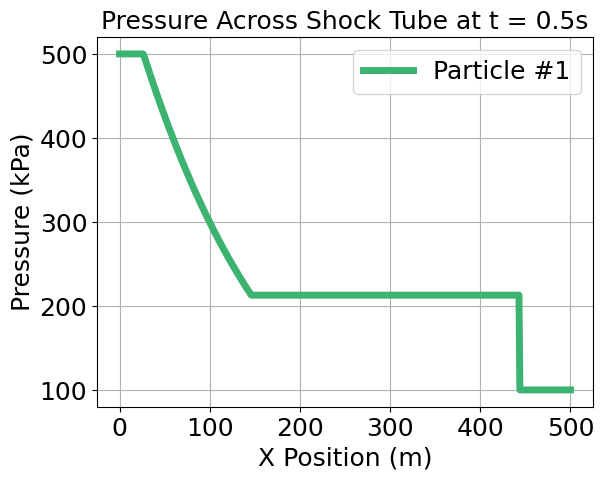

In [53]:
# Given values
u_p0 = 0
d1 = 1 # m
d2 = 0.5e-3 # m
d3 = 1e-3 # m

rho_p = 2520 # kg/m^3

x0 = 0 # Initial Particle Position

# Particle Mass = Volume * Density
m_p1 = 1/6 * np.pi * d1**3 * rho_p
m_p2 = 1/6 * np.pi * d2**3 * rho_p
m_p3 = 1/6 * np.pi * d3**3 * rho_p

x_vals_1, P_vals, rho_vals, u_vals, positions, regions = main(x0, u_p0, d1, m_p1)
# x_vals_2, y_vals_2, positions, regions = main(x0, u_p0, d2, m_p2)
# x_vals_3, y_vals_3, positions, regions = main(x0, u_p0, d3, m_p3)

plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)

plt.plot(x_vals_1, P_vals, linewidth=5, color='mediumseagreen', zorder=3, label='Particle #1')
# plt.plot(x_vals_2, y_vals_2 * 1e12, linewidth=5, color='orangered', zorder=2, label='Particle #2')
# plt.plot(x_vals_3, y_vals_3 * 1e12, linewidth=5, color='navy', zorder=1, label='Particle #3')
plt.ylabel('Pressure (kPa)', fontsize=18)
plt.xlabel('X Position (m)', fontsize=18)
plt.title('Pressure Across Shock Tube at t = 0.5s', fontsize=18)
plt.legend(fontsize=18)
plt.grid()
plt.show()

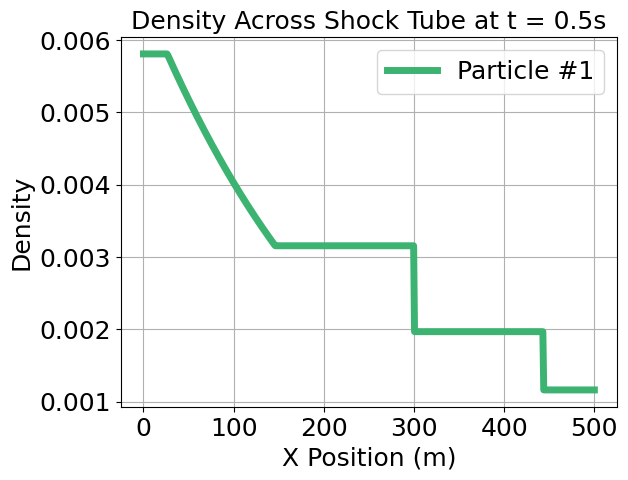

In [54]:
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)

plt.plot(x_vals_1, rho_vals, linewidth=5, color='mediumseagreen', zorder=3, label='Particle #1')
# plt.plot(x_vals_2, y_vals_2 * 1e12, linewidth=5, color='orangered', zorder=2, label='Particle #2')
# plt.plot(x_vals_3, y_vals_3 * 1e12, linewidth=5, color='navy', zorder=1, label='Particle #3')
plt.ylabel('Density', fontsize=18)
plt.xlabel('X Position (m)', fontsize=18)
plt.title('Density Across Shock Tube at t = 0.5s', fontsize=18)
plt.legend(fontsize=18)
plt.grid()
plt.show()

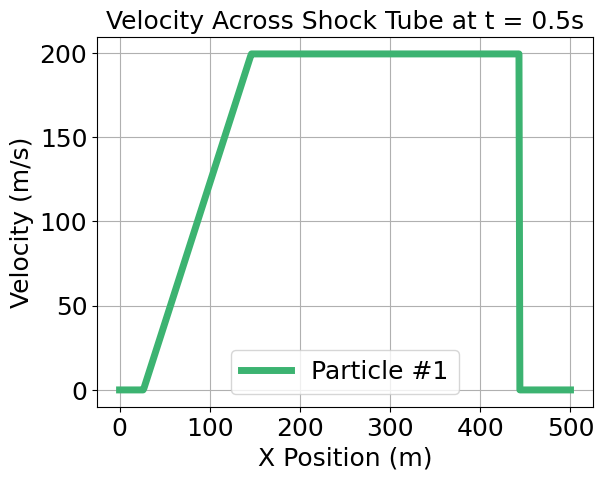

In [55]:
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)

plt.plot(x_vals_1, u_vals, linewidth=5, color='mediumseagreen', zorder=3, label='Particle #1')
# plt.plot(x_vals_2, y_vals_2 * 1e12, linewidth=5, color='orangered', zorder=2, label='Particle #2')
# plt.plot(x_vals_3, y_vals_3 * 1e12, linewidth=5, color='navy', zorder=1, label='Particle #3')
plt.ylabel('Velocity (m/s)', fontsize=18)
plt.xlabel('X Position (m)', fontsize=18)
plt.title('Velocity Across Shock Tube at t = 0.5s', fontsize=18)
plt.legend(fontsize=18)
plt.grid()
plt.show()

In [38]:
# Printing positions
print('Positions:')
for desc, vals in positions.items():
    print('{0:10} : {1}'.format(desc, vals))
print()

# Printing p, rho and u for regions
print('Regions:')
for region, vals in sorted(regions.items()):
    print('{0:10} : {1}'.format(region, vals))

Positions:
Head of Rarefaction : 26.405645253078575
Foot of Rarefaction : 146.07270411644038
Contact Discontinuity : 299.72254905280147
Shock      : 443.4501170381709

Regions:
Region 1   : (500, 0.005807200929152149, 0)
Region 2   : RAREFACTION
Region 3   : (212.7872995969768, 0.0031546377418677865, 199.44509810560294)
Region 4   : (212.7872995969768, 0.001967282638512575, 199.44509810560294)
Region 5   : (100, 0.0011614401858304297, 0.0)
